# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Monica Dyah Pudyowati
- **Email:** monicadyah.md14@gmail.com
- **ID Dicoding:** monicadyp

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana pengaruh musim (*season*) terhadap rata-rata jumlah penyewaan sepeda harian?
- **Pertanyaan 2:** Bagaimana pola penyewaan sepeda berdasarkan jam (*hour*) dalam sehari? Apakah ada jam-jam sibuk tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data harian (day.csv)
day_df = pd.read_csv("day.csv")
print("Lima baris pertama data day:")
display(day_df.head())

# Memuat data per jam (hour.csv)
hour_df = pd.read_csv("hour.csv")
print("Lima baris pertama data hour:")
display(hour_df.head())

Lima baris pertama data day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Lima baris pertama data hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data berhasil dimuat. File day.csv berisi data penyewaan harian, dan hour.csv berisi data per jam.
- Kedua dataset memiliki kolom kunci yang sama seperti dteday, season, yr, mnth, dll.

### Assessing Data

In [3]:
# Cek info dataset day
print("Info Data Day:")
day_df.info()
print("\nMissing Value Day:\n", day_df.isna().sum())
print("\nJumlah Duplikasi Day:", day_df.duplicated().sum())

# Cek info dataset hour
print("\n" + "="*50 + "\n")
print("Info Data Hour:")
hour_df.info()
print("\nMissing Value Hour:\n", hour_df.isna().sum())
print("\nJumlah Duplikasi Hour:", hour_df.duplicated().sum())

Info Data Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing Value Day:
 instant       0
dteday        0
season        0
yr       

**Insight:**
- Tidak ditemukan missing value (data kosong) pada kedua dataset.
- Tidak ditemukan data duplikat pada kedua dataset.
- Tipe data pada kolom dteday masih berupa object (string), sebaiknya diubah menjadi tipe data datetime.

### Cleaning Data

In [4]:
# Mengubah tipe data 'dteday' menjadi datetime pada kedua dataframe
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah label season agar lebih mudah dipahami (1:Spring, 2:Summer, 3:Fall, 4:Winter)
# Keterangan ini berdasarkan Readme.txt dataset aslinya
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)
hour_df['season_label'] = hour_df['season'].map(season_map)

# Cek hasil perbaikan tipe data
print("Info Data Day Terbaru:")
day_df.info()
print("\nContoh data dengan label season baru:")
display(day_df[['dteday', 'season', 'season_label', 'cnt']].head())

Info Data Day Terbaru:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday        731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   yr            731 non-null    int64         
 4   mnth          731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weathersit    731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731

,dteday,season,season_label,cnt
0,2011-01-01,1,Spring,985
1,2011-01-02,1,Spring,801
2,2011-01-03,1,Spring,1349
3,2011-01-04,1,Spring,1562
4,2011-01-05,1,Spring,1600


**Insight:**
- Kolom dteday sudah berhasil diubah menjadi tipe datetime.
- Kolom baru season_label telah ditambahkan untuk mempermudah pembacaan grafik nanti (mengubah angka 1-4 menjadi nama musim).

## Exploratory Data Analysis (EDA)

### Explore Data

In [5]:
# Melihat rangkuman statistik deskriptif dari data day
print("Statistik Deskriptif Day:")
display(day_df.describe(include="all"))

# Melihat rata-rata penyewaan berdasarkan musim
print("\nRata-rata penyewaan berdasarkan musim:")
season_agg = day_df.groupby('season_label')['cnt'].mean().sort_values(ascending=False)
print(season_agg)

# Melihat rata-rata penyewaan berdasarkan jam (menggunakan hour_df)
print("\nRata-rata penyewaan berdasarkan jam (5 jam teratas):")
hour_agg = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print(hour_agg.head())

Statistik Deskriptif Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN



Rata-rata penyewaan berdasarkan musim:
season_label
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64

Rata-rata penyewaan berdasarkan jam (5 jam teratas):
hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64


**Insight:**
- Rata-rata penyewaan sepeda tertinggi terjadi pada musim Fall (Gugur), diikuti oleh Summer. Musim Spring memiliki rata-rata penyewaan terendah.
- Berdasarkan jam, penyewaan tertinggi rata-rata terjadi pada jam 17:00 (5 sore) dan 18:00 (6 sore), serta jam 08:00 (8 pagi). Ini mengindikasikan penggunaan sepeda untuk berangkat dan pulang kerja/sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Musim

/tmp/ipython-input-3108965457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


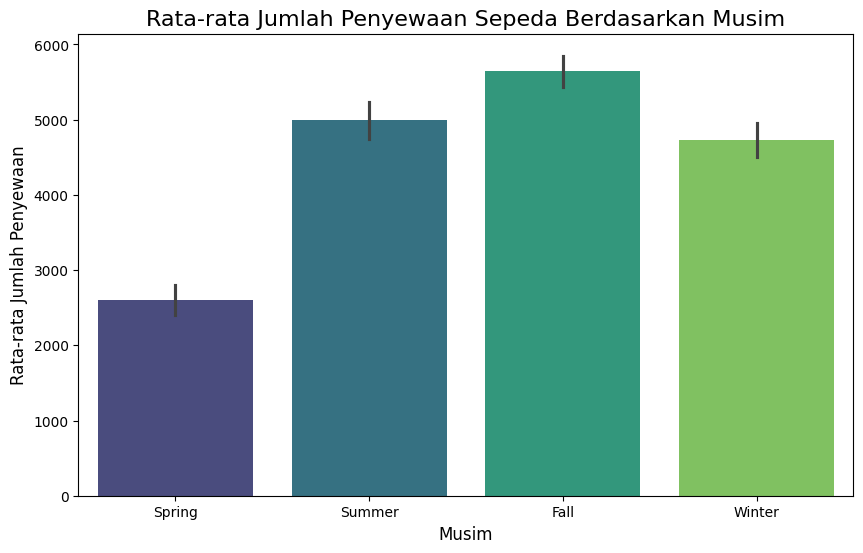

In [6]:
plt.figure(figsize=(10, 6))

# Mengurutkan data berdasarkan rata-rata cnt agar visualisasi rapi
sns.barplot(
    x='season_label',
    y='cnt',
    data=day_df,
    estimator='mean', # Menampilkan rata-rata
    order=['Spring', 'Summer', 'Fall', 'Winter'], # Urutan musim
    palette='viridis'
)

plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.show()

### Pertanyaan 2: Pola Jam Sibuk

/tmp/ipython-input-347160112.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


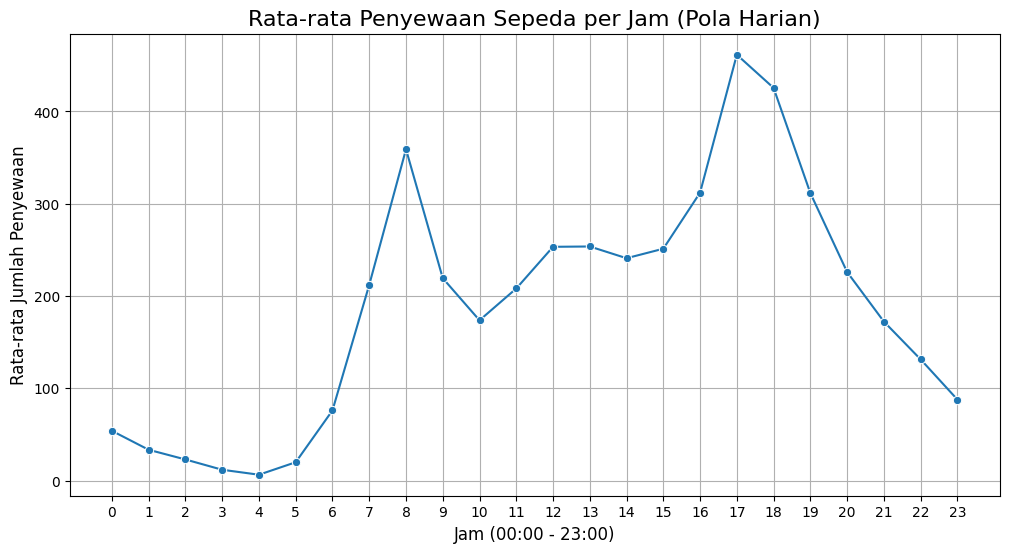

In [7]:
plt.figure(figsize=(12, 6))

# Membuat line plot untuk melihat tren per jam
sns.lineplot(
    x='hr',
    y='cnt',
    data=hour_df,
    estimator='mean', # Rata-rata penyewaan per jam
    ci=None,          # Menghilangkan shadow confidence interval agar grafik bersih
    marker='o'
)

plt.title('Rata-rata Penyewaan Sepeda per Jam (Pola Harian)', fontsize=16)
plt.xlabel('Jam (00:00 - 23:00)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24)) # Menampilkan semua angka jam 0-23
plt.grid(True)
plt.show()

**Insight:**
- Grafik 1 (Musim): Terlihat jelas bahwa musim Fall (Gugur) memiliki tingkat penyewaan tertinggi, mencapai rata-rata di atas 5000 penyewaan per hari. Musim dingin (Winter) mengalami penurunan namun masih lebih tinggi dibanding Spring.
- Grafik 2 (Jam): Terbentuk pola "bimodal" (dua puncak). Puncak pertama pukul 8 pagi, dan puncak kedua (tertinggi) pukul 5-6 sore. Siang hari relatif stabil, dan malam hingga dini hari sangat rendah.

## Analisis Lanjutan (Opsional)

/tmp/ipython-input-1760810343.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


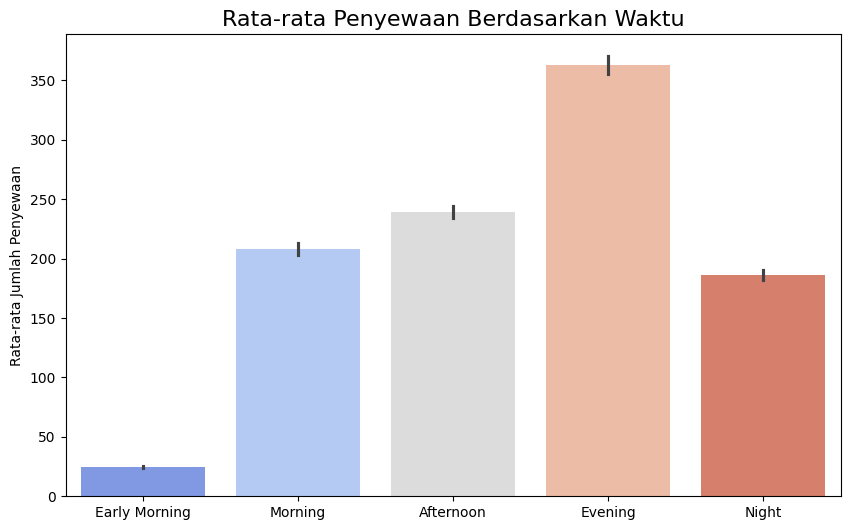

In [8]:
# Membuat kategori waktu berdasarkan jam (Clustering Sederhana)
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'

# Menerapkan fungsi ke kolom 'hr'
hour_df['time_of_day'] = hour_df['hr'].apply(categorize_time_of_day)

# Mengatur urutan kategori agar rapi di grafik
order_time = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(
    x='time_of_day',
    y='cnt',
    data=hour_df,
    order=order_time,
    palette='coolwarm',
    estimator='mean'
)
plt.title('Rata-rata Penyewaan Berdasarkan Waktu', fontsize=16)
plt.xlabel(None)
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Insight:**
- Dari analisis clustering waktu di atas, terlihat bahwa kategori Evening (Sore hari jam 15-19) merupakan waktu paling produktif untuk penyewaan sepeda, diikuti oleh Morning. Aktivitas paling rendah terjadi pada Early Morning (dini hari).

## Conclusion

- **Conclution pertanyaan 1:** Musim memiliki pengaruh yang signifikan terhadap minat penyewaan sepeda. Musim gugur (**Fall**) merupakan periode paling populer bagi pengguna sepeda, sementara musim semi (**Spring**) adalah yang paling sepi. Operator penyewaan sepeda sebaiknya memaksimalkan ketersediaan unit dan promosi saat musim gugur dan panas.
- **Conclution pertanyaan 2:** Terdapat pola jam sibuk yang sangat jelas terkait dengan aktivitas komuter (bekerja/sekolah). Jam sibuk utama adalah pukul **17:00 - 18:00** (pulang kerja) dan **08:00** (berangkat kerja). Strategi *maintenance* atau pengisian ulang stasiun sepeda sebaiknya dilakukan di luar jam-jam sibuk tersebut (misalnya pukul 22:00 - 05:00) agar tidak mengganggu pengguna.